In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kilarivarshith","key":"085e72bba3bc8ff5bfd70d50b45fa54c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import zipfile
import os

# Path to your zip file (example: uploaded via files.upload())
zip_path = "/content/underwater plastic detection.v1i.yolov8.zip"

# Destination folder
extract_path = "/content/underwater plastic detection.v1i.yolov8"

# Make sure the folder exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Files extracted to: {extract_path}")

✅ Files extracted to: /content/underwater plastic detection.v1i.yolov8


In [ ]:
import os
import shutil

# Define source and destination paths
src_base = "/content/underwater plastic detection.v1i.yolov8"
dst_base = "/content/plastics_filtered"

target_classes = {
    8: 1,  # trash_bag → pbag
    9: 2   # trash_bottle → pbottle
}

def process_split(split):
    src_images = os.path.join(src_base, split, "images")
    src_labels = os.path.join(src_base, split, "labels")
    dst_images = os.path.join(dst_base, split, "images")
    dst_labels = os.path.join(dst_base, split, "labels")

    os.makedirs(dst_images, exist_ok=True)
    os.makedirs(dst_labels, exist_ok=True)

    for label_file in os.listdir(src_labels):
        src_label_path = os.path.join(src_labels, label_file)

        with open(src_label_path, 'r') as f:
            lines = f.readlines()

        # Filter and remap labels
        new_lines = []
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id in target_classes:
                parts[0] = str(target_classes[class_id])
                new_lines.append(" ".join(parts) + "\n")

        if new_lines:
            # Copy image
            image_file = label_file.replace(".txt", ".jpg")  # adjust if image format is .png
            src_image_path = os.path.join(src_images, image_file)
            dst_image_path = os.path.join(dst_images, image_file)
            dst_label_path = os.path.join(dst_labels, label_file)

            if os.path.exists(src_image_path):
                shutil.copy2(src_image_path, dst_image_path)
                with open(dst_label_path, 'w') as f:
                    f.writelines(new_lines)

# Run for all splits
for split in ["train", "valid", "test"]:
    process_split(split)

print("✅ Done merging selected classes into plastics_filtered.")

✅ Done merging selected classes into plastics_filtered.


In [ ]:
from ultralytics import YOLO
import os

model = YOLO("yolov8m.pt")

model.train(
    data="/content/plastics_filtered/data.yaml",  # YAML path
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolov8m_plastics_merged",
    amp=True,
    exist_ok=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 317MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/plastics_filtered/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_plastics_merged, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

100%|██████████| 755k/755k [00:00<00:00, 18.4MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192,

100%|██████████| 5.35M/5.35M [00:00<00:00, 119MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1051.8±319.4 MB/s, size: 40.6 KB)


train: Scanning /content/plastics_filtered/train/labels... 2441 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2441/2441 [00:01<00:00, 2413.06it/s]


train: New cache created: /content/plastics_filtered/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 577, len(boxes) = 4089. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 396.7±139.3 MB/s, size: 45.6 KB)


val: Scanning /content/plastics_filtered/valid/labels... 630 images, 0 backgrounds, 0 corrupt: 100%|██████████| 630/630 [00:00<00:00, 840.19it/s]


val: New cache created: /content/plastics_filtered/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 157, len(boxes) = 861. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/yolov8m_plastics_merged/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_plastics_merged
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.07G      1.359      2.294      1.593         25        640: 100%|██████████| 153/153 [01:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.00it/s]

                   all        630        861      0.144       0.29      0.108     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.28G      1.602      2.238      1.751         24        640: 100%|██████████| 153/153 [01:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]

                   all        630        861     0.0154      0.393     0.0138    0.00701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.34G      1.604      2.241      1.738         29        640: 100%|██████████| 153/153 [01:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.534      0.181      0.146     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.34G      1.551      2.172      1.727         39        640: 100%|██████████| 153/153 [01:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]

                   all        630        861      0.682       0.27      0.281      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.34G      1.492      2.016      1.666         22        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]

                   all        630        861      0.523      0.216      0.208       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.34G       1.43      1.924      1.623         24        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]

                   all        630        861      0.376      0.323      0.298      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.34G      1.407      1.839      1.603         22        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

                   all        630        861      0.578      0.375      0.379      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.34G      1.376      1.758      1.578         32        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

                   all        630        861      0.391      0.443      0.366      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.45G      1.342       1.68      1.559         28        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]

                   all        630        861      0.511       0.42       0.44      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.37G      1.306      1.614      1.535         44        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]

                   all        630        861      0.493      0.455      0.436      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.29G      1.284      1.551      1.524         38        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]

                   all        630        861      0.461      0.442      0.423      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.37G      1.257      1.507      1.511         25        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        630        861      0.527      0.459       0.47      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.38G      1.252      1.459      1.496         33        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.569      0.582      0.602      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.36G      1.224      1.415      1.473         44        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

                   all        630        861      0.581      0.456      0.528      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.28G       1.22      1.364      1.459         18        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.585      0.516      0.563      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.38G      1.183      1.315       1.44         38        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.623      0.588      0.618      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.38G      1.161      1.284      1.432         26        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]

                   all        630        861      0.763      0.581      0.681      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.36G      1.151      1.239      1.424         25        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]

                   all        630        861      0.665      0.649      0.688      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.28G       1.16      1.229      1.424         24        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

                   all        630        861      0.694      0.607      0.645      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.38G      1.126       1.18      1.399         21        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]

                   all        630        861      0.714      0.612      0.692      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.37G      1.109      1.144      1.381         19        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        630        861      0.731      0.611      0.672      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.36G      1.102      1.145       1.39         44        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.662      0.626      0.694      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.28G      1.092      1.095      1.376         20        640: 100%|██████████| 153/153 [01:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        630        861      0.731      0.629       0.71      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.36G      1.082       1.08      1.367         21        640: 100%|██████████| 153/153 [01:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.753      0.677      0.764       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.35G      1.074      1.047      1.368         20        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]

                   all        630        861        0.7      0.695      0.738      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.39G      1.069      1.049       1.36         27        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]

                   all        630        861       0.75      0.688      0.748      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.27G      1.037      1.006      1.338         20        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]

                   all        630        861      0.849      0.713      0.819      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.36G      1.037     0.9681      1.336         25        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

                   all        630        861       0.82        0.7      0.803      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       6.4G      1.037     0.9914      1.343         38        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861       0.77      0.679       0.74      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.36G      1.032     0.9726      1.329         23        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

                   all        630        861       0.81      0.758      0.826      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.28G     0.9974     0.9241      1.316         37        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        630        861      0.813      0.751      0.809      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.36G     0.9961     0.9091      1.309         15        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.785      0.754      0.816      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.37G     0.9933     0.8917      1.311         19        640: 100%|██████████| 153/153 [01:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.855      0.693      0.809      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.36G     0.9653     0.8713      1.295         30        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

                   all        630        861      0.889      0.729      0.846      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.28G     0.9764      0.842        1.3         23        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        630        861      0.851      0.772      0.846      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.37G     0.9514     0.8281      1.285         29        640: 100%|██████████| 153/153 [01:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        630        861      0.879       0.74      0.828      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.39G     0.9471     0.8051      1.271         34        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]

                   all        630        861      0.852      0.763       0.84      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.36G     0.9312     0.7977      1.265         29        640: 100%|██████████| 153/153 [01:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

                   all        630        861      0.886      0.762      0.872      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.29G     0.9163     0.7889      1.259         21        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]

                   all        630        861      0.896       0.77      0.869      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.36G     0.8936     0.7395      1.246         17        640: 100%|██████████| 153/153 [01:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]

                   all        630        861      0.861      0.788      0.866      0.624


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.36G     0.8216     0.6055      1.193         13        640: 100%|██████████| 153/153 [01:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]

                   all        630        861      0.818      0.757      0.851      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.35G     0.7926     0.5638      1.167         10        640: 100%|██████████| 153/153 [01:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]

                   all        630        861      0.837      0.773      0.862      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.28G     0.7758     0.5277      1.161         11        640: 100%|██████████| 153/153 [01:17<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

                   all        630        861      0.875      0.789      0.862      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.37G     0.7708     0.5117      1.158         11        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.874      0.759      0.864      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.36G     0.7571     0.4918      1.144         15        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.838      0.802      0.872      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.35G     0.7357     0.4781      1.129         32        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        630        861      0.832      0.794      0.873      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.27G     0.7419     0.4717      1.139         14        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.819      0.804      0.876      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.35G     0.7163     0.4546      1.121          9        640: 100%|██████████| 153/153 [01:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

                   all        630        861      0.878      0.792      0.878      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.35G     0.7086     0.4409      1.103         10        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        630        861      0.897      0.826      0.894      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       6.4G     0.6976     0.4302        1.1         11        640: 100%|██████████| 153/153 [01:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]

                   all        630        861      0.881      0.809      0.882      0.642



50 epochs completed in 1.253 hours.
Optimizer stripped from runs/detect/yolov8m_plastics_merged/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_plastics_merged/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_plastics_merged/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


                   all        630        861      0.896      0.826      0.894      0.647
                  Mask         77         90      0.972      0.773       0.91      0.685
                  pbag        432        472      0.914      0.953      0.971      0.815
               pbottle        137        299        0.8      0.751      0.801      0.443
Speed: 0.2ms preprocess, 9.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/yolov8m_plastics_merged


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7883009a9350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/yolov8m_plastics_merged/weights/best.pt')

model.predict(
    source='/content/plastics_filtered/test/images/',
    name='yolov8m_plastics_merged_predict',
    exist_ok=True,
    save=True
)


image 1/308 /content/plastics_filtered/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e06b1a6873ec4240c3493f281822c9d9.jpg: 640x640 1 Mask, 1 pbottle, 36.2ms
image 2/308 /content/plastics_filtered/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33eb90a2198eccbfbc6e7961b953ac4a.jpg: 640x640 3 Masks, 36.3ms
image 3/308 /content/plastics_filtered/test/images/7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg: 640x640 1 Mask, 35.9ms
image 4/308 /content/plastics_filtered/test/images/GettyImages-1227891345-1000x667_jpg.rf.32ae9a5a4e410851af33ae743636ac1a.jpg: 640x640 2 Masks, 35.5ms
image 5/308 /content/plastics_filtered/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg: 640x640 1 Mask, 32.0ms
image 6/308 /content/plastics_filtered/test/images/STOCK_DSC8177_3opix2_jpg.rf.e9f5811cd21ce1f2ac92b50c20df9b5d.jpg: 640x640 1 Mask, 24.4ms
image 7/308 /content/plastics_filtered/test/images/ailnlmva_jpg.rf.116e0b65179da59d199d5

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Mask', 1: 'pbag', 2: 'pbottle'}
 obb: None
 orig_img: array([[[176, 159,  19],
         [176, 159,  19],
         [176, 159,  19],
         ...,
         [133, 114,  41],
         [109,  94,  32],
         [115, 103,  45]],
 
        [[176, 159,  19],
         [176, 159,  19],
         [176, 159,  19],
         ...,
         [111,  93,  22],
         [145, 131,  72],
         [109,  98,  41]],
 
        [[176, 159,  19],
         [176, 159,  19],
         [176, 159,  19],
         ...,
         [212, 195, 128],
         [188, 175, 119],
         [144, 133,  81]],
 
        ...,
 
        [[ 40,  97,  89],
         [ 37,  96,  88],
         [ 35,  94,  90],
         ...,
         [ 22,  33,  30],
         [ 20,  29,  16],
         [ 20,  26,   9]],
 
        [[ 35,  94,  86],
         [ 34,  93,  85],
         [ 33,  92,  88],
         

In [ ]:
import os
import glob
import random
import matplotlib.pyplot as plt

def visualize_predictions(result_dir="/content/runs/detect/yolov8m_plastics_merged_predict", num_images=4):
    image_paths = glob.glob(os.path.join(result_dir, "*.jpg"))

    if not image_paths:
        print(f"❌ No images found in the prediction folder: {result_dir}")
        return

    num_images = min(num_images, len(image_paths))
    selected_images = random.sample(image_paths, num_images)

    cols = 2
    rows = (num_images + 1) // 2

    plt.figure(figsize=(15, 5 * rows))
    for i, image_path in enumerate(selected_images):
        img = plt.imread(image_path)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(image_path))
    plt.tight_layout()
    plt.show()

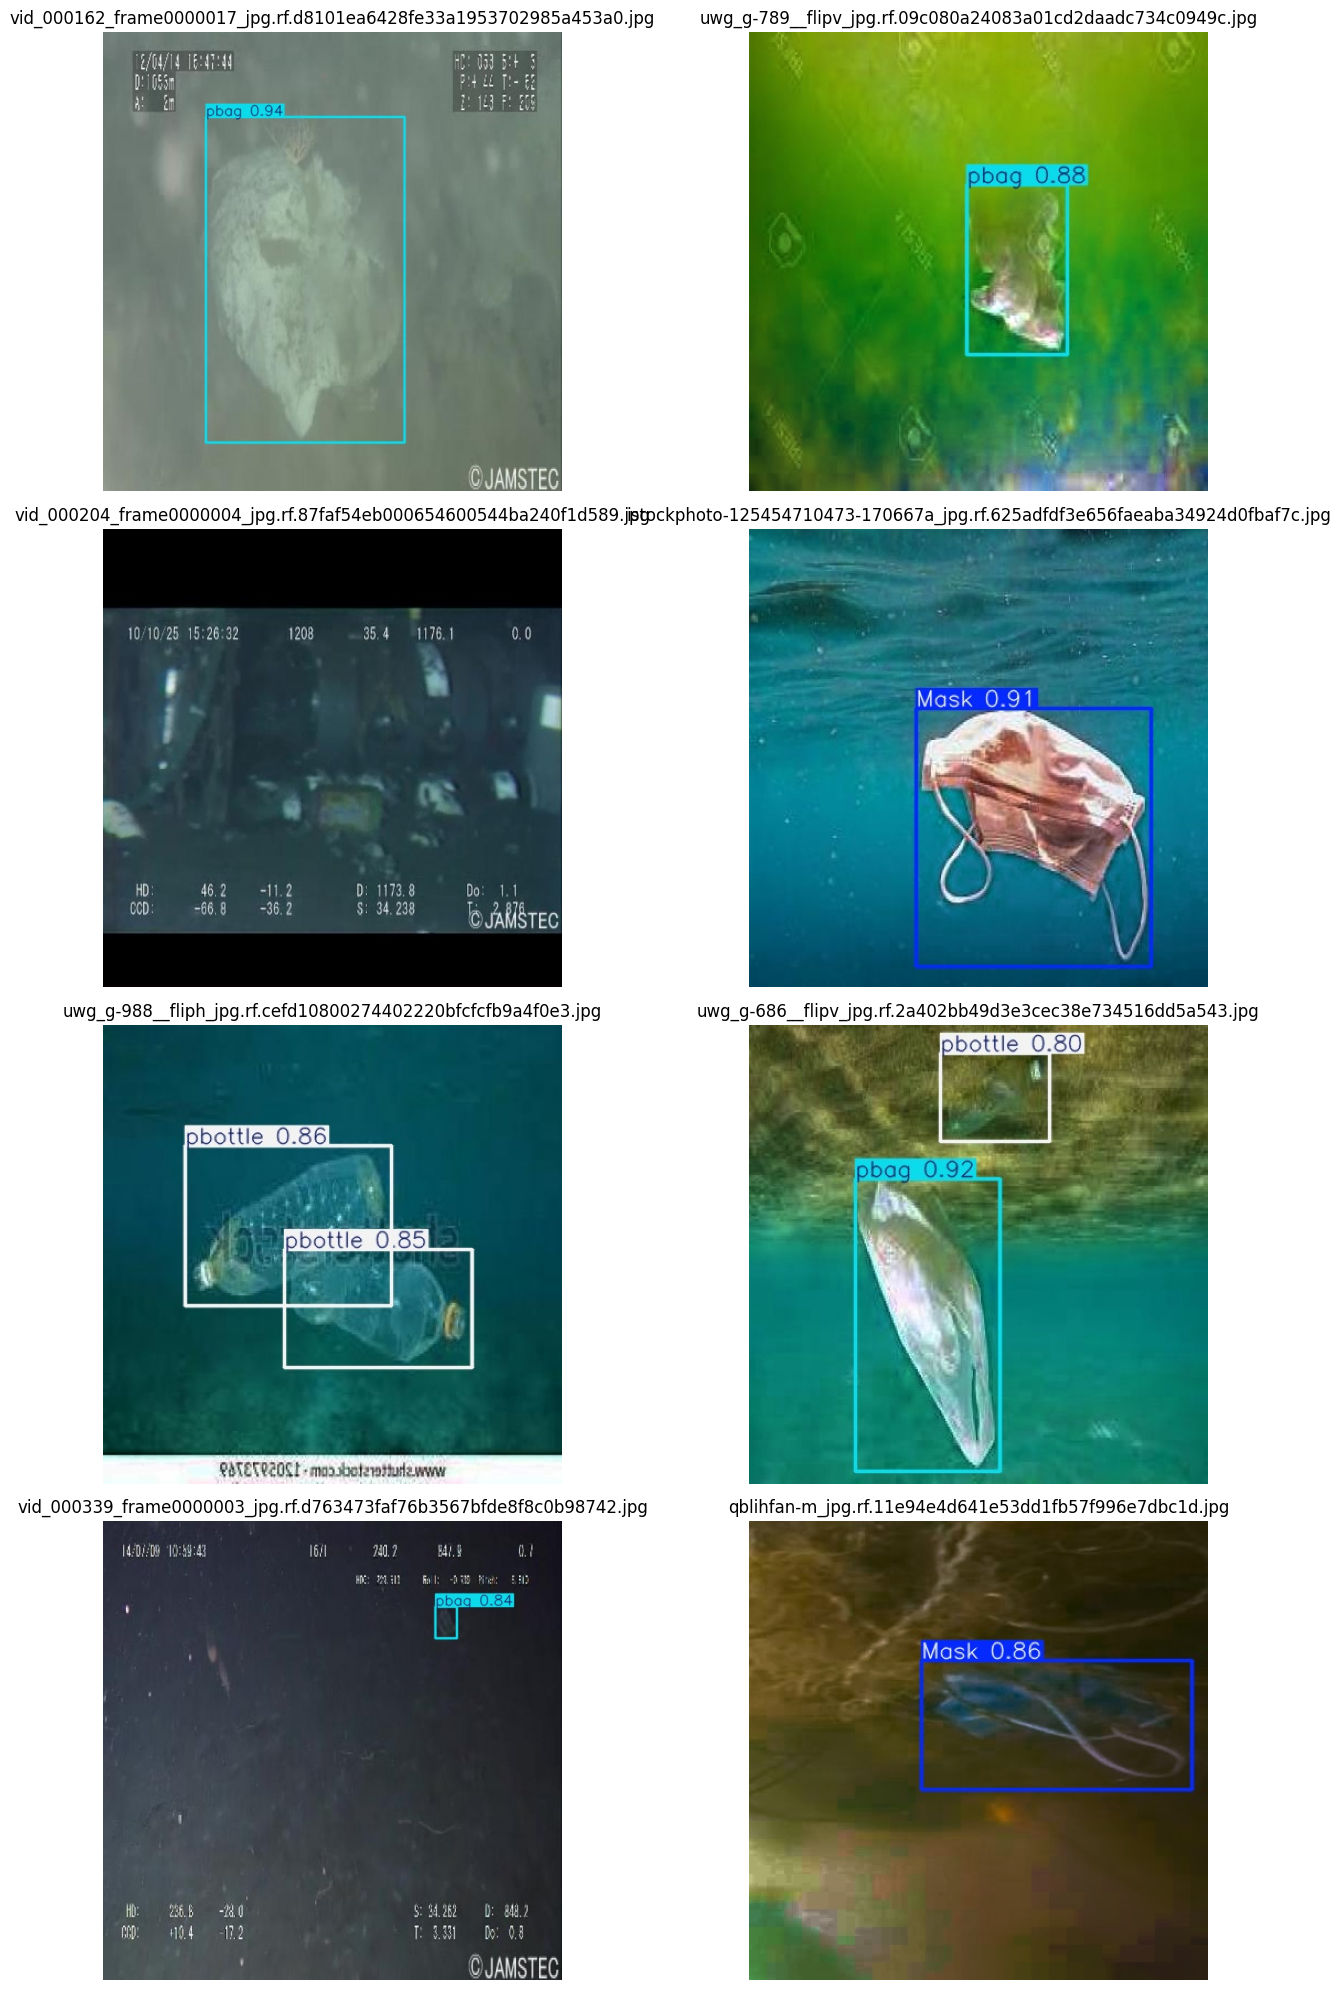

In [ ]:
visualize_predictions("/content/runs/detect/yolov8m_plastics_merged_predict", num_images=8)

In [ ]:
!zip -r uwod_m_plastic_merged.zip /content/

Streaming output truncated to the last 5000 lines.
  adding: content/plastics_filtered/train/images/vid_000143_frame0000055_jpg.rf.28448a0d5c0cc2602a99e946cb94be15.jpg (deflated 1%)
  adding: content/plastics_filtered/train/images/vid_000332_frame0000109_jpg.rf.bb94650fd688374d0aa79c622b83fc4a.jpg (deflated 3%)
  adding: content/plastics_filtered/train/images/uwg_g-550__fliph_jpeg_jpg.rf.7dce4622efa4f1850a25743629720f49.jpg (deflated 3%)
  adding: content/plastics_filtered/train/images/uwg_g-635_jpg.rf.2a6fb90062b36d2322308584a13a412b.jpg (deflated 1%)
  adding: content/plastics_filtered/train/images/uwg_yt-12_jpg.rf.08bba76e2583fd152ed6e746dabb83e2.jpg (deflated 1%)
  adding: content/plastics_filtered/train/images/uwg_g-1041__fliph_jpg.rf.d10ff71244c22480d45b5bc82a33d975.jpg (deflated 3%)
  adding: content/plastics_filtered/train/images/uwg_g-1135_jpeg_jpg.rf.78fb250ab3d74e7ae2a85963a5484c21.jpg (deflated 2%)
  adding: content/plastics_filtered/train/images/vid_000162_frame0000032_jpg